In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['price'] = boston.target

In [9]:
y = bos['price']
x = bos.drop(['price'], axis = 1)

In [10]:
import statsmodels.api as sm

xc = sm.add_constant(x)

model = sm.OLS(y,xc).fit()

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 10 Mar 2020   Prob (F-statistic):          6.72e-135
Time:                        11:29:51   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Assumption 1: No multicollinearity among independent variables

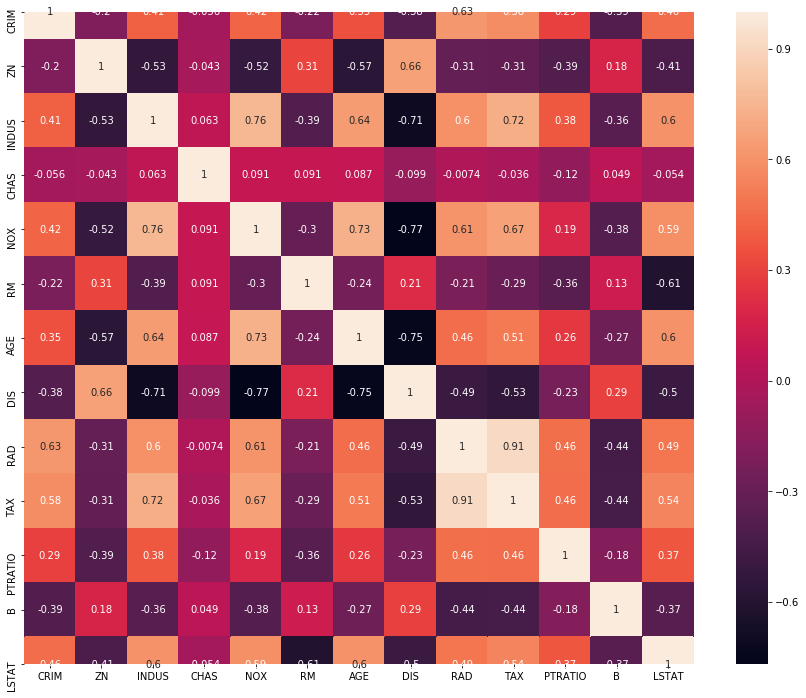

In [15]:
plt.figure(figsize = (15,12))
sns.heatmap(x.corr(), annot = True)

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [21]:
pd.DataFrame([vif(xc.values, i)        #xc.values make it as a matrix form and i acts as dependent variable
for i in range(xc.shape[1])], index = xc.columns, columns = ['VIF'])

,VIF
const,585.265238
CRIM,1.792192
ZN,2.298758
INDUS,3.991596
CHAS,1.073995
NOX,4.393720
RM,1.933744
AGE,3.100826
DIS,3.955945
RAD,7.484496


Since number of observationsin the data is only 500, we chose 10 as the VIF cutoff. Hence, we didn't remove any feature based on VIF.

Note: VIF analysis must be done with constant in the data. Otherwise VIF values will be misleading.

In [25]:
y1 = bos['price']
x1 = bos.drop(['price', 'INDUS', 'AGE'], axis = 1)
xc1 = sm.add_constant(x1)

# Remove the features INDUS and AGE based only on the probability (Significance)

### Assumption 2: Residuals must be normally distributed with mean  zero

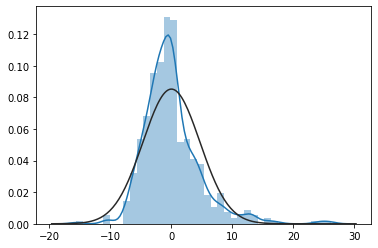

In [29]:
model1 = sm.OLS(y1,xc1).fit()
from scipy.stats import norm
norm.fit(model1.resid)

sns.distplot(model1.resid, fit = norm)      #.resid throws the residuals

In [27]:
model1.resid

0      -6.124281
1      -3.396528
2       4.166630
3       4.752005
4       8.217359
         ...    
501    -1.137900
502    -1.780817
503    -3.709999
504    -4.111333
505   -10.440843
Length: 506, dtype: float64

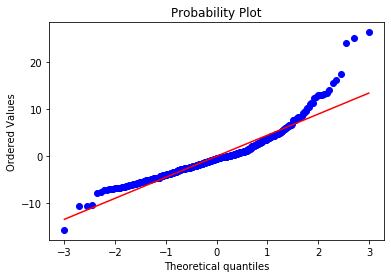

In [31]:
# Q-Q plot
from scipy import stats
stats.probplot(model1.resid, plot = plt)
plt.show()

### Statistical test of Normality

In [32]:
from scipy import stats
print(stats.jarque_bera(model1.resid))           #It throws Fvalue and probablitiy

(787.7851418746452, 0.0)


Since probability is less than 0.05, we'll reject the H0 and conclude that residuals are not normally distributed.

In [38]:
y = np.log(bos['price'])
x = bos.drop(['price', 'INDUS', 'AGE'], axis = 1)
xc = sm.add_constant(x)



In [39]:
model = sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     168.1
Date:                Tue, 10 Mar 2020   Prob (F-statistic):          4.31e-159
Time:                        12:00:32   Log-Likelihood:                 129.02
No. Observations:                 506   AIC:                            -234.0
Df Residuals:                     494   BIC:                            -183.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0837      0.203     20.112      0.000       3.685       4.483
CRIM          -0.0103      0.001     -7.856      0.000      -0.013      -0.008
ZN             0.0011      0.001      2.007      0.045    2.28e-05       0.002
CHAS           0.1051      0.034      3.072      0.002       0.038       0.172
NOX           -0.7217      0.142     -5.095      0.000      -1.000      -0.443
RM             0.0907      0.016      5.569      0.000       0.059       0.123
DIS           -0.0517      0.007     -6.948      0.000      -0.066      -0.037
RAD            0.0134      0.003      5.293      0.000       0.008       0.018
TAX           -0.0006      0.000     -4.129      0.000      -0.001      -0.000
PTRATIO       -0.0374      0.005     -7.237      0.000      -0.048      -0.027
B              0.0004      0.000      3.852      0.000       0.000       0.001
LSTAT         -0.0286      0.002    -15.053      0.000      -0.032      -0.025
==============================================================================
Omnibus:                       59.445   Durbin-Watson:                   1.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.361
Skew:                           0.459   Prob(JB):                     4.26e-50
Kurtosis:                       6.153   Cond. No.                     1.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

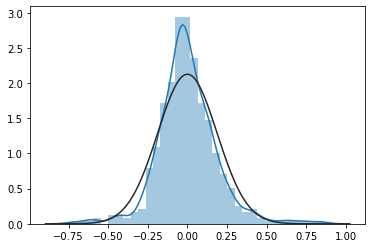

In [40]:
from scipy.stats import norm
norm.fit(model.resid)

sns.distplot(model.resid, fit = norm)

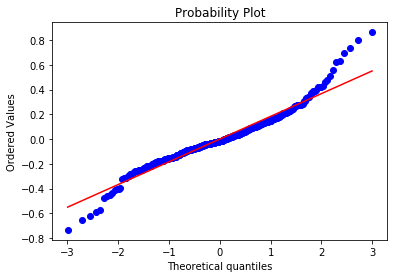

In [41]:
stats.probplot(model.resid, plot = plt)
plt.show()

In [42]:
# Statistical test of Normality
print(stats.jarque_bera(model.resid))  # And still it's zero

(227.36073522664645, 0.0)


In [43]:
y = np.log(bos['price'])
x = bos.drop(['price', 'INDUS', 'AGE'], axis = 1)
x = np.log1p(x)
xc = sm.add_constant(x)

# Since transformation of Y didn't solve the problem of normality, we transformed the x dataset. log1p was used because there 
# are zeroes in the data. This function will add 1 to  the features before taking log.

In [44]:
model = sm.OLS(y, xc).fit()

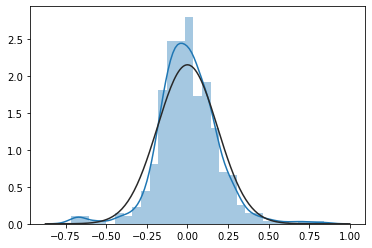

In [45]:
norm.fit(model.resid)

sns.distplot(model.resid, fit = norm)

In [46]:
# Statistical test of Normality
print(stats.jarque_bera(model.resid))

(188.0761714723752, 0.0)


### Assumption 3: Residuals are homoscedastic

In [47]:
y = bos['price']
x = bos.drop(['price', 'INDUS', 'AGE'], axis = 1)
xc = sm.add_constant(x)

In [49]:
model = sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Tue, 10 Mar 2020   Prob (F-statistic):          5.54e-137
Time:                        12:08:39   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3411      5.067      7.171      0.000      26.385      46.298
CRIM          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
ZN             0.0458      0.014      3.390      0.001       0.019       0.072
CHAS           2.7187      0.854      3.183      0.002       1.040       4.397
NOX          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
RM             3.8016      0.406      9.356      0.000       3.003       4.600
DIS           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
RAD            0.2996      0.063      4.726      0.000       0.175       0.424
TAX           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
PTRATIO       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
B              0.0093      0.003      3.475      0.001       0.004       0.015
LSTAT         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'residuals')

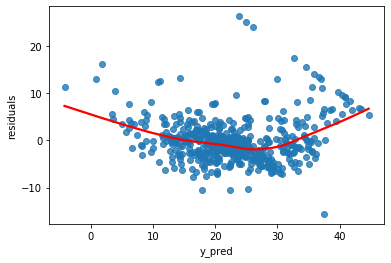

In [53]:
y_pred = model.predict(xc)
resids = model.resid

sns.regplot(y_pred, resids, lowess = True, line_kws = {'color': 'red'})
plt.xlabel('y_pred')
plt.ylabel('residuals')

The plot shows that there is a trend in the residuals. It shows larger values for residuals for lower y_pred and higher Y_pred

In [54]:
## Goldfeld test for checking homoscedasticity

import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F-statistics', 'P-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)   
print(lzip(name, test))

[('F-statistics', 2.2836707086343955), ('P-value', 1.345412663053935e-10)]


H0 : Variance of Residuals is constant across the range of data
H1 : Variance of Residuals is not constant across the range of data

Since Pvalue is less than 0.05 we'll reject the H0 to conclude that residuals are heteroscedastic (means unequal variance).

In [55]:
y = np.log(bos['price'])
x = bos.drop(['price', 'INDUS', 'AGE'], axis = 1)
xc = sm.add_constant(x)


C:\Users\Loki\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Text(0, 0.5, 'residuals')

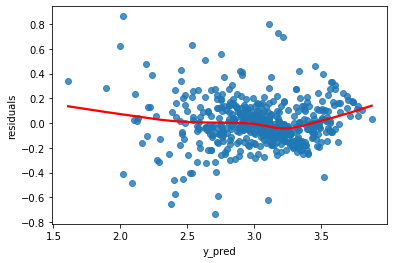

In [56]:
model = sm.OLS(y,xc).fit()
y_pred = model.predict(xc)
resids = model.resid

sns.regplot(y_pred, resids, lowess = True, line_kws = {'color': 'red'})
plt.xlabel('y_pred')
plt.ylabel('residuals')

In [57]:
## Goldfeld test for checking homoscedasticity

import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F-statistics', 'P-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)   
print(lzip(name, test))

[('F-statistics', 3.3406534001167136), ('P-value', 4.92659681291011e-20)]


Transformation of y made the heteroscedasticity worse as probability as it's lower compared to model without transformation. Hence, we'll not proceed with transformation.

### Assumption 4: There is no autocorrelation among the residuals

In [58]:
y = bos['price']
x = bos.drop(['price', 'INDUS', 'AGE'], axis = 1)
xc = sm.add_constant(x)

<bound method Figure.show of <Figure size 432x288 with 1 Axes>>

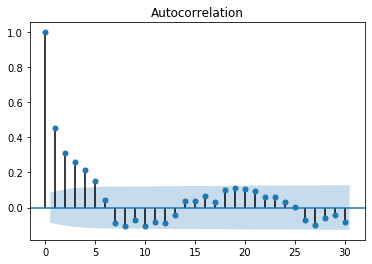

In [60]:
model = sm.OLS(y,xc).fit()

import statsmodels.tsa.api as smt         #tsa - Time Series Analysis
acf = smt.graphics.plot_acf(model.resid, lags = 30, alpha = 0.05)

acf.show

The blue area line is the significance level. If the line is beyond the area, it implies that there is correlation and the line within the blue area implies that there is autocorrelation or weak correlation.

In [61]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Tue, 10 Mar 2020   Prob (F-statistic):          5.54e-137
Time:                        14:08:51   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3411      5.067      7.171      0.000      26.385      46.298
CRIM          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
ZN             0.0458      0.014      3.390      0.001       0.019       0.072
CHAS           2.7187      0.854      3.183      0.002       1.040       4.397
NOX          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
RM             3.8016      0.406      9.356      0.000       3.003       4.600
DIS           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
RAD            0.2996      0.063      4.726      0.000       0.175       0.424
TAX           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
PTRATIO       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
B              0.0093      0.003      3.475      0.001       0.004       0.015
LSTAT         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

DW - statistics for any model will be between 0 and 4. To conclude that there's no autocorrelation DW - Statistics should be around 2. The DW statistic for the model is 1.078 and this indicates moderate level of autocorrelation.

### Assumption 5: Linearity of Relationship

In [62]:
y = bos['price']
x = bos.drop(['price', 'INDUS', 'AGE'], axis = 1)
xc = sm.add_constant(x)

In [64]:
model = sm.OLS(y,xc).fit()

Text(0, 0.5, 'residuals')

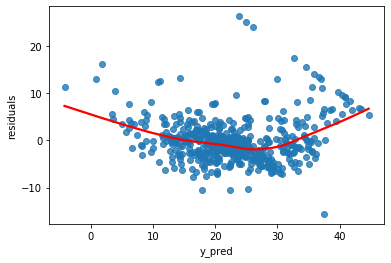

In [65]:
y_pred = model.predict(xc)
resids = model.resid

sns.regplot(y_pred, resids, lowess = True, line_kws = {'color': 'red'})
plt.xlabel('y_pred')
plt.ylabel('residuals')

Text(0, 0.5, 'price_predicted')

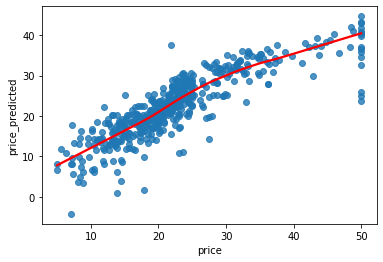

In [66]:
sns.regplot(x = y, y = y_pred, lowess = True, line_kws = {'color':'red'})
plt.xlabel('price')
plt.ylabel('price_predicted')


The pattern expected when residuals are plotted against y_pred is a horizontal line around zero. The pattern in the graph suggest that model deign needs to be improved (we may need to add square and multiplicative terms to the model).

The expected pattern wheny and y_pred is plotted is a line passing through origin with a slope of 45 degrees. However, the model shows a pattern  away from expected.

### Rainbow test for linearity of residuals

In [67]:
import statsmodels.api as sm

In [68]:
sm.stats.diagnostic.linear_rainbow(res = model, frac = 0.5)

(0.5781612495333305, 0.9999908142705343)

H0: Residuals exhibit linearity
H1: Residuals exhibit non-linearity

Based on the test we can conclude that there's no series non-linearity.